In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
raw_data=pd.read_csv('data_cleaned.csv')

In [8]:
raw_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,88792836,100654011,Caucasian,Female,[70-80),[75-100),3,3,1,10,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1,88986678,58682736,Caucasian,Male,[80-90),[50-75),1,11,5,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
2,89032962,69250302,Caucasian,Male,[60-70),[100-125),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,>30
3,89191392,62022042,Caucasian,Male,[40-50),[75-100),1,3,7,3,...,No,No,No,No,No,No,No,No,Yes,>30
4,89277516,30950811,Caucasian,Male,[50-60),[100-125),3,1,1,2,...,No,No,No,No,No,No,No,No,Yes,>30


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              937 non-null    int64  
 1   patient_nbr               937 non-null    int64  
 2   race                      937 non-null    object 
 3   gender                    937 non-null    object 
 4   age                       937 non-null    object 
 5   weight                    937 non-null    object 
 6   admission_type_id         937 non-null    int64  
 7   discharge_disposition_id  937 non-null    int64  
 8   admission_source_id       937 non-null    int64  
 9   time_in_hospital          937 non-null    int64  
 10  payer_code                937 non-null    object 
 11  medical_specialty         937 non-null    object 
 12  num_lab_procedures        937 non-null    int64  
 13  num_procedures            937 non-null    int64  
 14  num_medica

In [10]:
#some of the categories does not make sense, like the id of encounter,id of patients, payer code, so I drop these columns.
raw_data.drop('encounter_id',axis=1,inplace=True)
raw_data.drop('patient_nbr',axis=1,inplace=True)
raw_data.drop('payer_code',axis=1,inplace=True)
raw_data.drop('number_outpatient',axis=1,inplace=True)
raw_data.drop('number_inpatient',axis=1,inplace=True)
raw_data.drop('number_emergency',axis=1,inplace=True)
raw_data.drop('num_lab_procedures',axis=1,inplace=True)
raw_data.drop('num_procedures',axis=1,inplace=True)
raw_data.drop('num_medications',axis=1,inplace=True)

In [11]:
raw_data

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,diag_1,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[70-80),[75-100),3,3,1,10,Surgery-General,715,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1,Caucasian,Male,[80-90),[50-75),1,11,5,6,Family/GeneralPractice,250.2,...,No,Steady,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[60-70),[100-125),1,1,7,2,Cardiology,414,...,No,No,No,No,No,No,No,No,Yes,>30
3,Caucasian,Male,[40-50),[75-100),1,3,7,3,Psychiatry,296,...,No,No,No,No,No,No,No,No,Yes,>30
4,Caucasian,Male,[50-60),[100-125),3,1,1,2,Surgery-General,196,...,No,No,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,AfricanAmerican,Male,[70-80),[75-100),1,1,7,1,InternalMedicine,584,...,No,Steady,No,No,No,No,No,No,Yes,NO
933,Caucasian,Male,[30-40),[100-125),1,1,7,4,Family/GeneralPractice,250.8,...,No,No,No,No,No,No,No,No,No,NO
934,Caucasian,Male,[60-70),[100-125),1,1,7,3,InternalMedicine,435,...,No,No,No,No,No,No,No,No,Yes,NO
935,Caucasian,Female,[70-80),[50-75),1,3,7,13,InternalMedicine,486,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [12]:
def drop_row(df,column,letter):
    df=df.reset_index(drop=True)
    for i in range(df.shape[0]):
        if df[column][i][0]==letter:
            df.drop(i,axis=0,inplace=True)
    return df
raw_data=drop_row(raw_data,'diag_1','E')
raw_data=drop_row(raw_data,'diag_1','V')
raw_data=drop_row(raw_data,'diag_3','E')
raw_data=drop_row(raw_data,'diag_3','V')

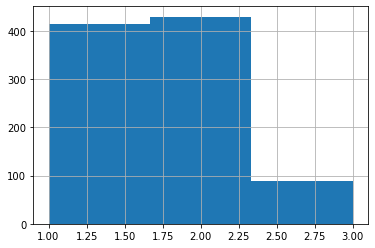

In [5]:
_=raw_data['readmitted'].hist(bins=3)
# About 400 records show no readmitted, while other about 500 records show readmitted.

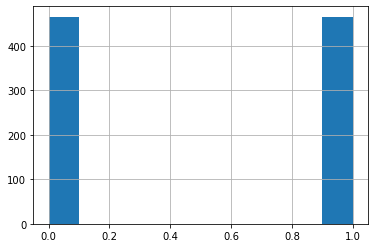

In [6]:
_=raw_data['gender'].hist()

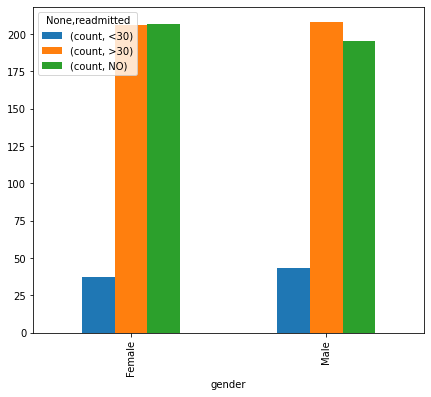

In [74]:
df_pivot = pd.pivot_table(raw_data, values='age',index="gender",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
# different genders show the similar results on readmitted, but still it can be related

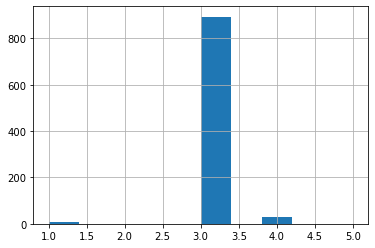

In [7]:
_=raw_data['race'].hist()
#it has balanced in race, but it's inevitable. 

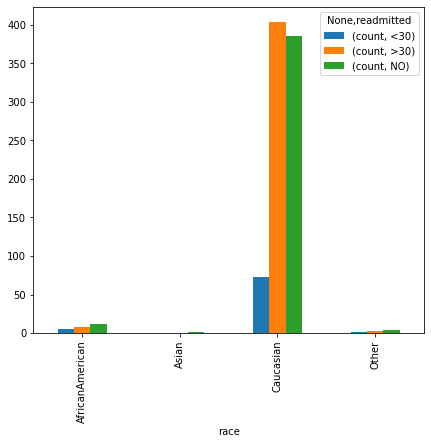

In [75]:
df_pivot = pd.pivot_table(raw_data, values='age',index="race",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
# the sample of different races is not balanced, which can not be convinced that races has relationship with readmitted or not

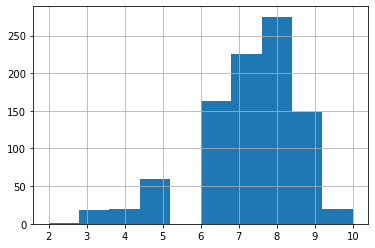

In [8]:
_=raw_data['age'].hist()
#sample in age is not balanced, but as the dataset is collected in diabate patients, it is inevitable

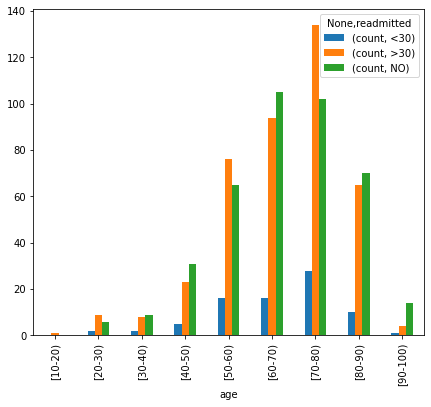

In [77]:
df_pivot = pd.pivot_table(raw_data, values='race',index="age",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
# age can be related with the readmitted

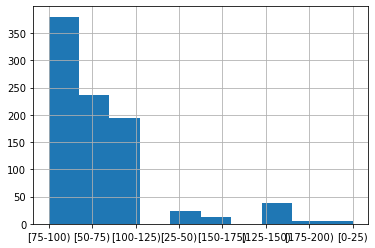

In [78]:
_=raw_data['weight'].hist()

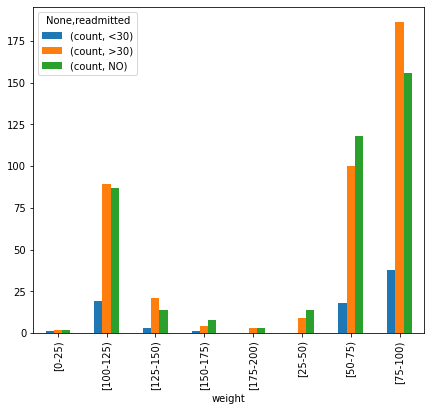

In [80]:
df_pivot = pd.pivot_table(raw_data, values='age',index="weight",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)
# weight can be related with readmitted as weighted over 75 has a higher readmitted than other

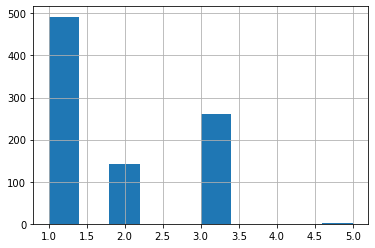

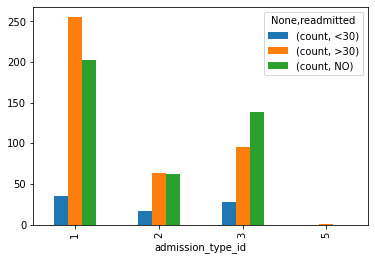

In [84]:
_=raw_data['admission_type_id'].hist()
df_pivot = pd.pivot_table(raw_data, values='age',index="admission_type_id",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# the no column shows different in with different admission type id, which means the column can be related with target column

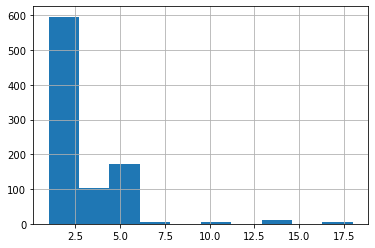

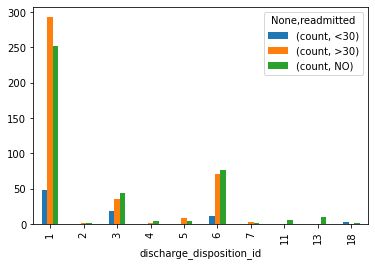

In [86]:
_=raw_data['discharge_disposition_id'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="discharge_disposition_id",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#id=1 and id=6 have different percentage of readmitted and none readmitted, which means this column related with the target

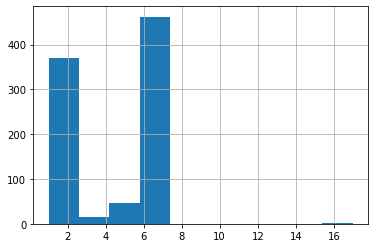

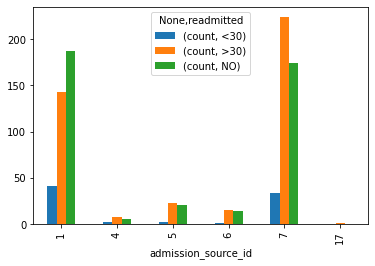

In [87]:
_=raw_data['admission_source_id'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="admission_source_id",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#with admission source id=1 has most of the none readmitted patients and other id has most readmitted patients, this column influence the target column

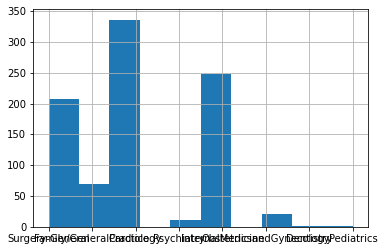

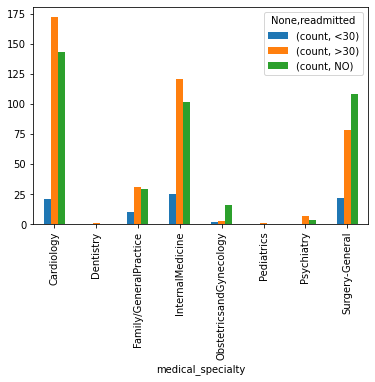

In [90]:
_=raw_data['medical_specialty'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="medical_specialty",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#with surgery-general has most of the none readmitted patients and other id has most readmitted patients, this column influence the target column

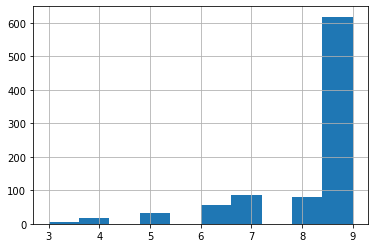

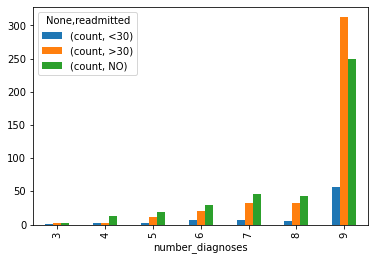

In [92]:
_=raw_data['number_diagnoses'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="number_diagnoses",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#only id=6 has larger readmitted than no readmitted. This column can be related with the target.

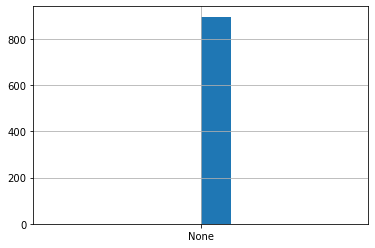

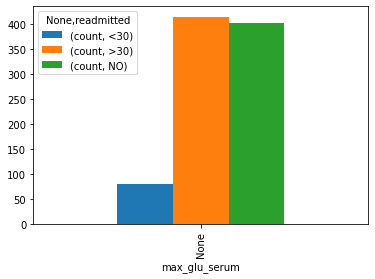

In [93]:
_=raw_data['max_glu_serum'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="max_glu_serum",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not relate column

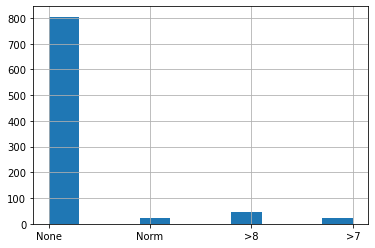

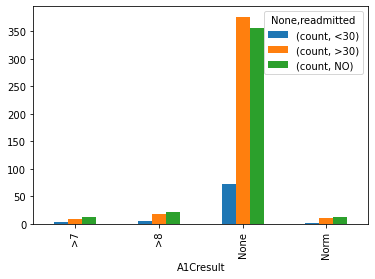

In [94]:
_=raw_data['A1Cresult'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="A1Cresult",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#none A1Cresult has less none readmitted, shows the column can be related with the target.

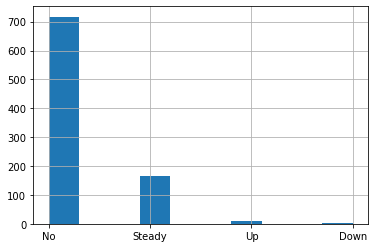

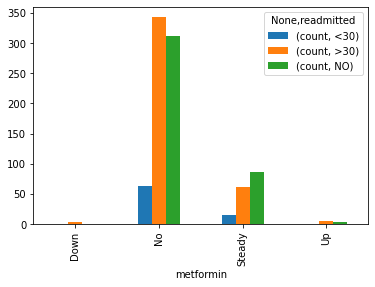

In [95]:
_=raw_data['metformin'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="metformin",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it counts.

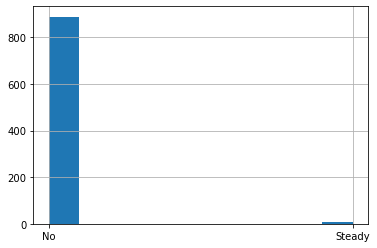

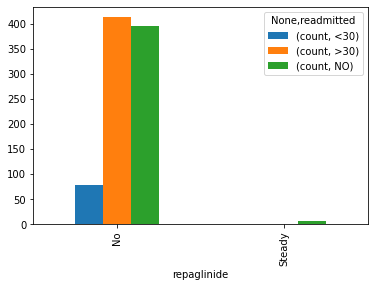

In [96]:
_=raw_data['repaglinide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="repaglinide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# not relate

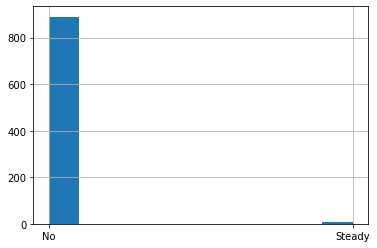

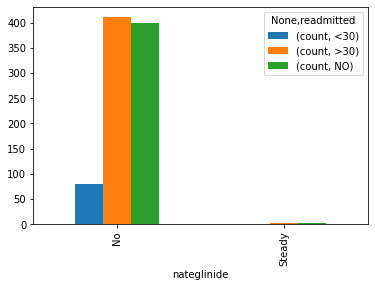

In [97]:
_=raw_data['nateglinide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="nateglinide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not relate

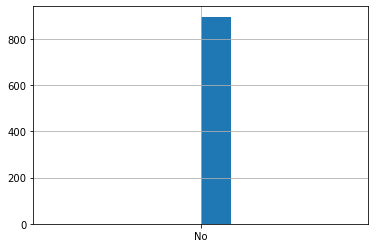

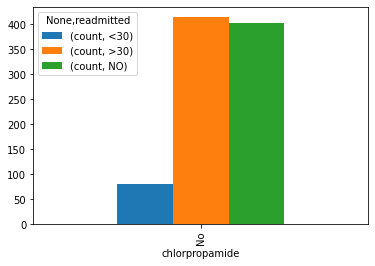

In [98]:
_=raw_data['chlorpropamide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="chlorpropamide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not relate

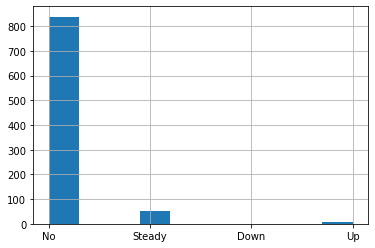

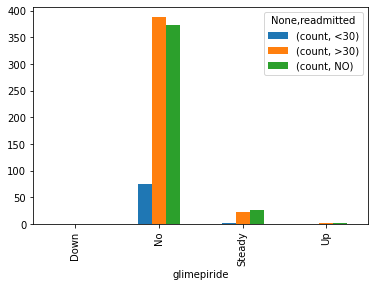

In [99]:
_=raw_data['glimepiride'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glimepiride",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it can be related with the target

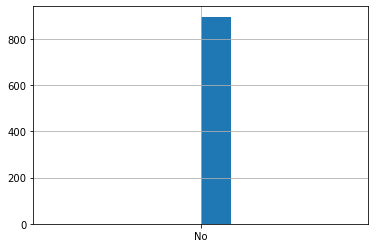

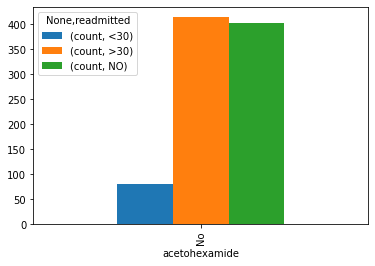

In [100]:
_=raw_data['acetohexamide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="acetohexamide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# not related

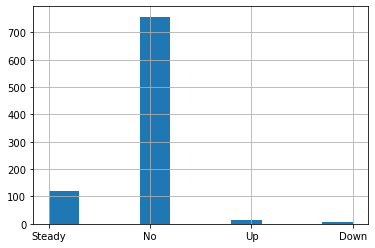

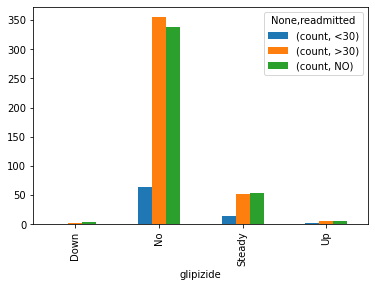

In [101]:
_=raw_data['glipizide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glipizide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it can be related

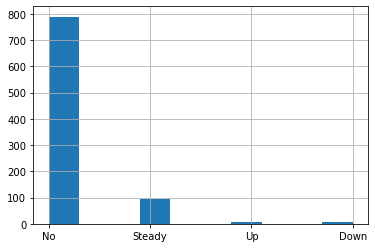

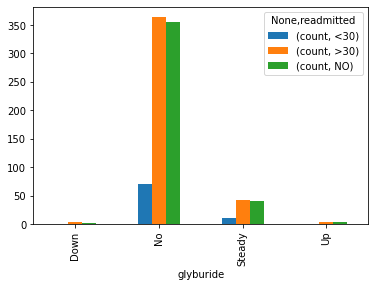

In [102]:
_=raw_data['glyburide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glyburide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# it can be related

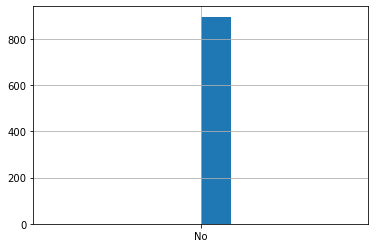

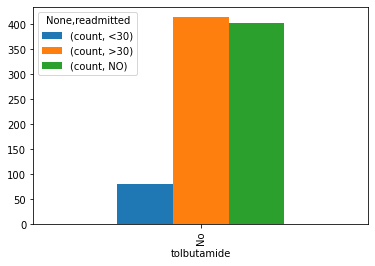

In [103]:
_=raw_data['tolbutamide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="tolbutamide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# not related

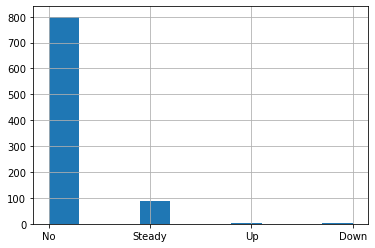

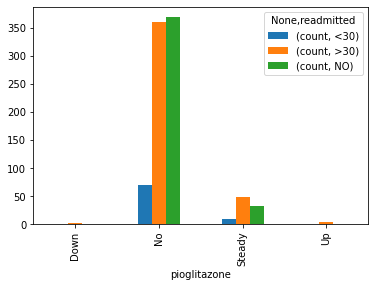

In [104]:
_=raw_data['pioglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="pioglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# can be related

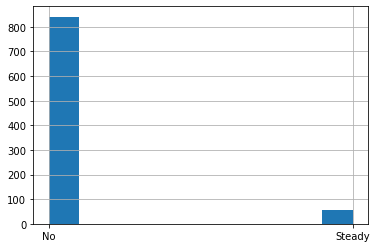

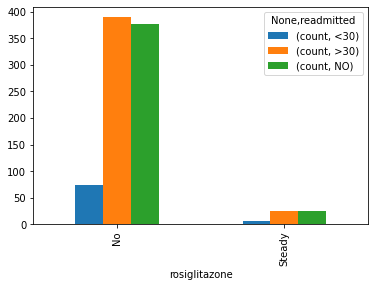

In [105]:
_=raw_data['rosiglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="rosiglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#can be related

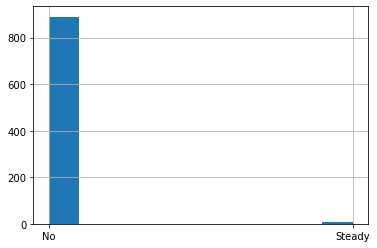

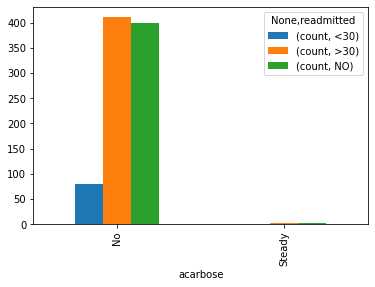

In [106]:
_=raw_data['acarbose'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="acarbose",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# not related

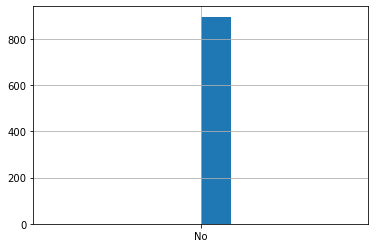

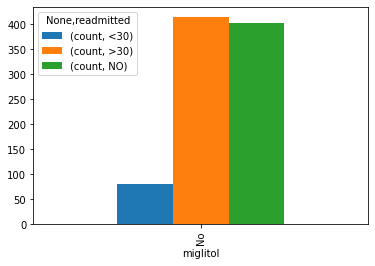

In [107]:
_=raw_data['miglitol'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="miglitol",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

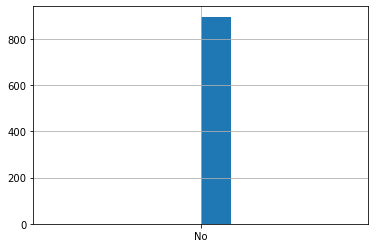

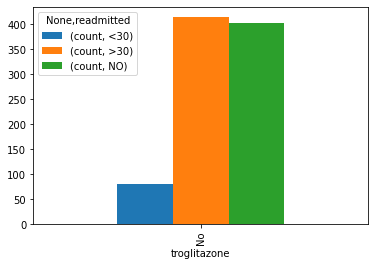

In [108]:
_=raw_data['troglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="troglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
# not related

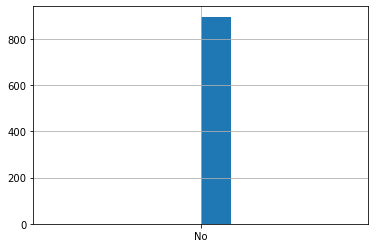

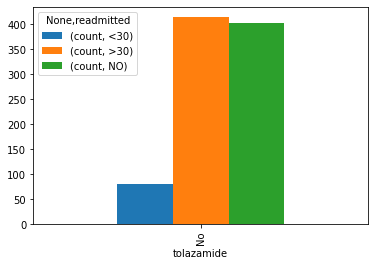

In [109]:
_=raw_data['tolazamide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="tolazamide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

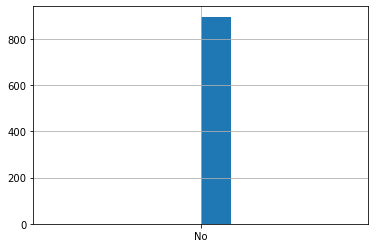

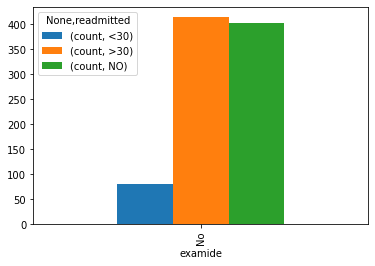

In [110]:
_=raw_data['examide'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="examide",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

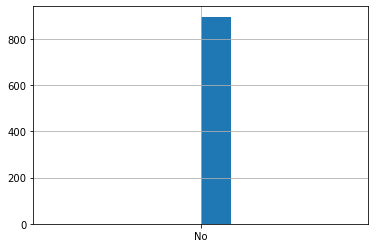

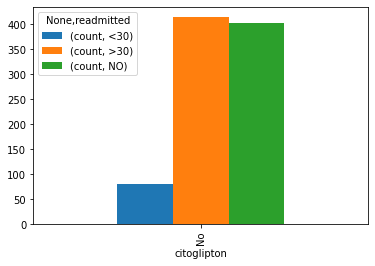

In [112]:
_=raw_data['citoglipton'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="citoglipton",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

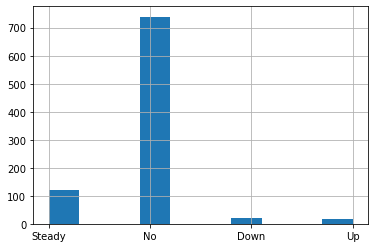

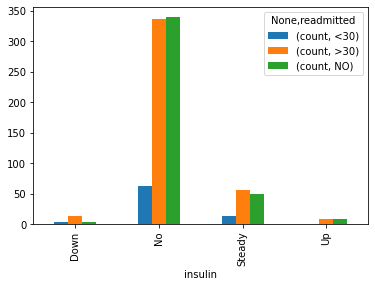

In [113]:
_=raw_data['insulin'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="insulin",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it can be related

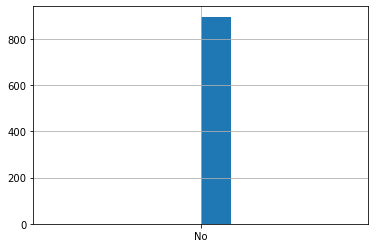

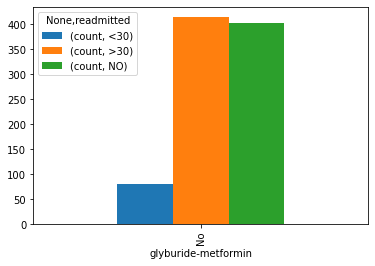

In [114]:
_=raw_data['glyburide-metformin'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glyburide-metformin",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

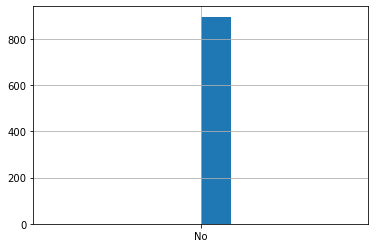

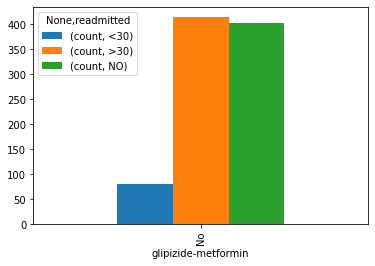

In [115]:
_=raw_data['glipizide-metformin'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glipizide-metformin",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

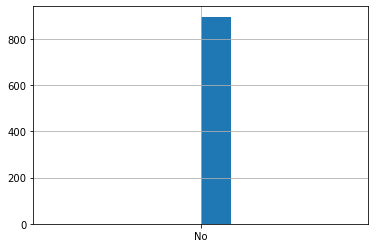

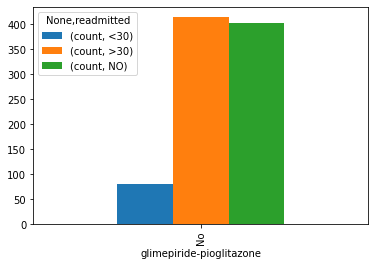

In [116]:
_=raw_data['glimepiride-pioglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="glimepiride-pioglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

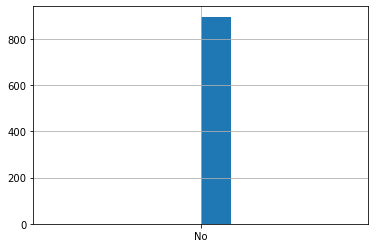

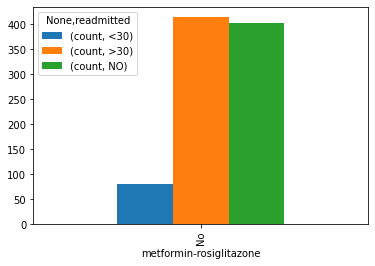

In [117]:
_=raw_data['metformin-rosiglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="metformin-rosiglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

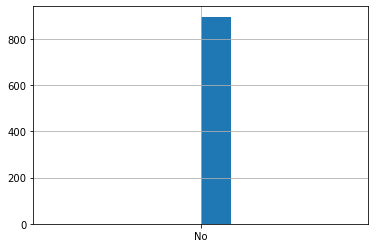

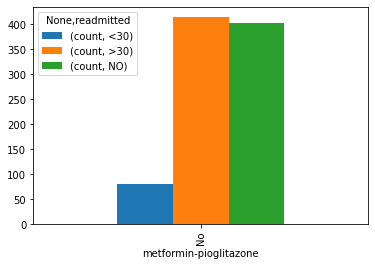

In [118]:
_=raw_data['metformin-pioglitazone'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="metformin-pioglitazone",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#not related

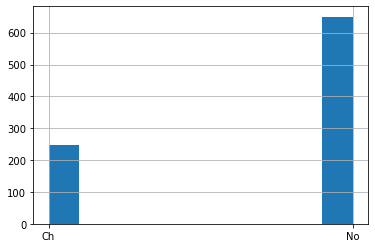

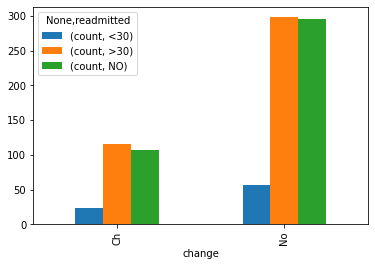

In [119]:
_=raw_data['change'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="change",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it can be related but not so much related. The percentage of readmitted for different changes seems alike.

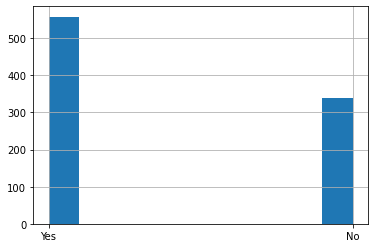

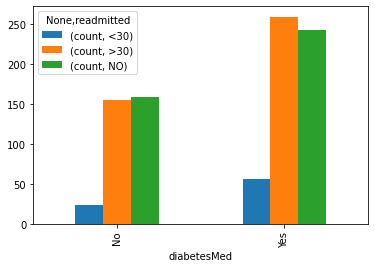

In [120]:
_=raw_data['diabetesMed'].hist()
df_pivot = pd.pivot_table(raw_data, values='race',index="diabetesMed",columns="readmitted", aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
#it can be related

In [121]:
#drop the unrelated data from above
raw_data.drop('race',axis=1,inplace=True)
raw_data.drop('max_glu_serum',axis=1,inplace=True)
raw_data.drop('repaglinide',axis=1,inplace=True)
raw_data.drop('nateglinide',axis=1,inplace=True)
raw_data.drop('chlorpropamide',axis=1,inplace=True)
raw_data.drop('acetohexamide',axis=1,inplace=True)
raw_data.drop('tolbutamide',axis=1,inplace=True)
raw_data.drop('acarbose',axis=1,inplace=True)
raw_data.drop('miglitol',axis=1,inplace=True)
raw_data.drop('troglitazone',axis=1,inplace=True)
raw_data.drop('tolazamide',axis=1,inplace=True)
raw_data.drop('examide',axis=1,inplace=True)
raw_data.drop('citoglipton',axis=1,inplace=True)
raw_data.drop('glyburide-metformin',axis=1,inplace=True)
raw_data.drop('glipizide-metformin',axis=1,inplace=True)
raw_data.drop('glimepiride-pioglitazone',axis=1,inplace=True)
raw_data.drop('metformin-rosiglitazone',axis=1,inplace=True)
raw_data.drop('metformin-pioglitazone',axis=1,inplace=True)

In [125]:
raw_data

,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,diag_1,diag_2,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Female,[70-80),[75-100),3,3,1,10,Surgery-General,715,402.0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,<30
1,Male,[80-90),[50-75),1,11,5,6,Family/GeneralPractice,250.2,780.0,...,No,No,No,No,No,No,Steady,No,Yes,NO
2,Male,[60-70),[100-125),1,1,7,2,Cardiology,414,411.0,...,No,No,No,No,Steady,No,No,No,Yes,>30
3,Male,[40-50),[75-100),1,3,7,3,Psychiatry,296,303.0,...,No,No,No,No,Steady,No,No,No,Yes,>30
4,Male,[50-60),[100-125),3,1,1,2,Surgery-General,196,199.0,...,No,No,No,Steady,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,Male,[70-80),[75-100),1,1,7,1,InternalMedicine,584,403.0,...,No,No,No,No,No,No,Steady,No,Yes,NO
912,Male,[30-40),[100-125),1,1,7,4,Family/GeneralPractice,250.8,707.0,...,No,No,No,No,No,No,No,No,No,NO
913,Male,[60-70),[100-125),1,1,7,3,InternalMedicine,435,250.0,...,No,No,Steady,No,No,No,No,No,Yes,NO
914,Female,[70-80),[50-75),1,3,7,13,InternalMedicine,486,511.0,...,Steady,No,No,Down,No,No,No,Ch,Yes,NO


In [135]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 915
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    896 non-null    object 
 1   age                       896 non-null    object 
 2   weight                    896 non-null    object 
 3   admission_type_id         896 non-null    int64  
 4   discharge_disposition_id  896 non-null    int64  
 5   admission_source_id       896 non-null    int64  
 6   time_in_hospital          896 non-null    int64  
 7   medical_specialty         896 non-null    object 
 8   diag_1                    896 non-null    object 
 9   diag_2                    896 non-null    float64
 10  diag_3                    896 non-null    object 
 11  number_diagnoses          896 non-null    int64  
 12  A1Cresult                 896 non-null    object 
 13  metformin                 896 non-null    object 
 14  glimepirid

In [136]:
def map_values(df):
    df['gender'] = df['gender'].map({'Female':1, 'Male':0})

    df['weight'] = df['weight'].map({'[0-10)':1,
                                               '[10-25)':2, 
                                               '[25-50)':3, 
                                               '[50-75)':4, 
                                               '[75-100)':5, 
                                               '[100-125)':6, 
                                               '[125-150)':7,  
                                               '[150-175)':8, 
                                               '[175-200)':9,
                                               '>200':10})
    df['age'] = df['age'].map({'[0-25)':1,
                                               '[10-20)':2, 
                                               '[20-30)':3, 
                                               '[30-40)':4, 
                                               '[40-50)':5, 
                                               '[50-60)':6, 
                                               '[60-70)':7,  
                                               '[70-80)':8, 
                                               '[80-90)':9,
                                               '[90-100)':10})
    df['A1Cresult'] = df['A1Cresult'].map({'None':1, 'Norm':2, '>7':3, '>8':4})

    df['metformin'] = df['metformin'].map({'No':1, 'Down':2, 'Steady':2, 'Up':3})

    df['glimepiride'] = df['glimepiride'].map({'No':1, 'Down':2, 'Steady':3, 'Up':4})

    df['glipizide'] = df['glipizide'].map({'No':1, 'Down':2, 'Steady':3, 'Up':4})

    df['glyburide'] = df['glyburide'].map({'No':1, 'Down':2, 'Steady':3, 'Up':4})

    df['pioglitazone'] = df['pioglitazone'].map({'No':1, 'Down':2, 'Steady':3, 'Up':4})

    df['rosiglitazone'] = df['rosiglitazone'].map({'No':1, 'Down':2, 'Steady':3, 'Up':4})

    df['insulin'] = df['insulin'].map({'No':1, 'Down':2, 'Steady':2, 'Up':2})
    df['change'] = df['change'].map({'No':1,'Ch':2})
    df['diabetesMed'] = df['diabetesMed'].map({'No':1,'Yes':2})
    df['readmitted'] = df['readmitted'].map({'NO':1,'>30':2,'<30':3})
map_values(raw_data)

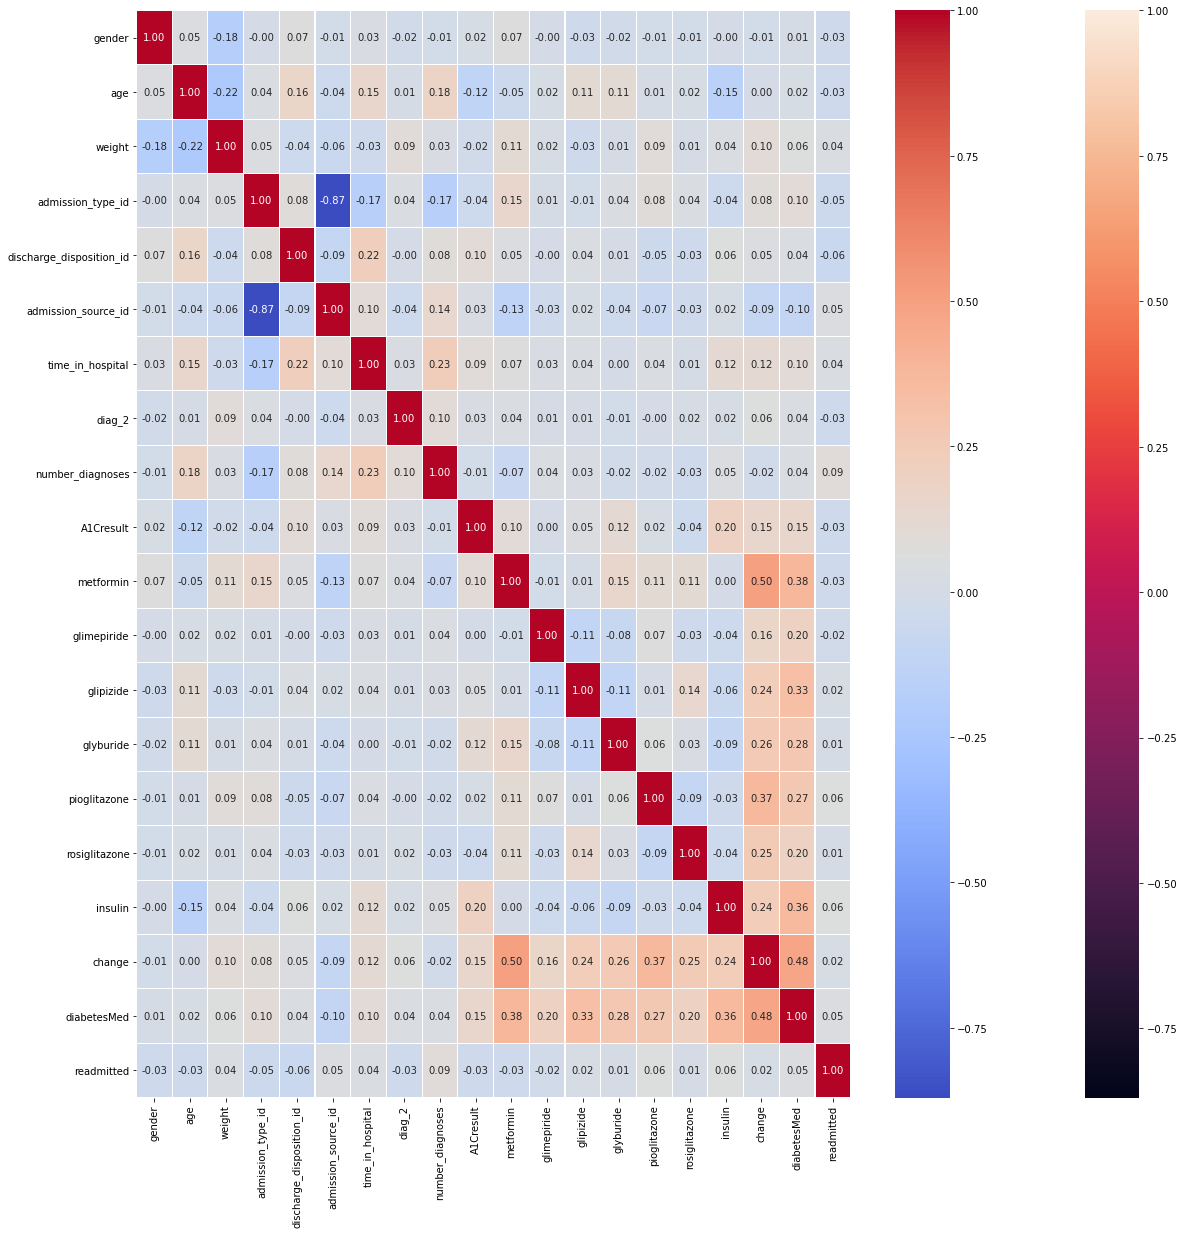

In [147]:
import seaborn as sns
corrmat = raw_data.corr()
plt.figure(figsize=(20, 20))
ax=sns.heatmap(corrmat)
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)

In [148]:
#admission type id and admission source id have a high correlation at 0.87, so drop one of them
raw_data.drop('admission_source_id',axis=1,inplace=True)